In [20]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib import patches
from PIL import Image
from IPython.display import clear_output
from pathlib import Path

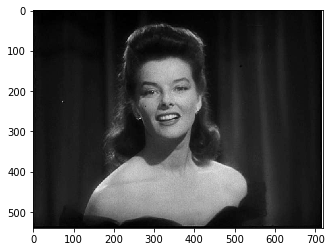

In [21]:
# Setup image and mask

#Insert your file name and extension here
#!wget -nv 'https://upload.wikimedia.org/wikipedia/commons/c/cd/Woman_of_the_year_10.jpg' -O input_img.jpg
img = np.array(Image.open('./input_img.jpg').convert('RGB'))

mask = np.zeros(img.shape[:2],np.uint8)

# GrabCut parameters
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
imageHeight = img.shape[:2][0]
imageWidth = img.shape[:2][1]

#Show image
figure, ax = plt.subplots(1)
ax.imshow(img)

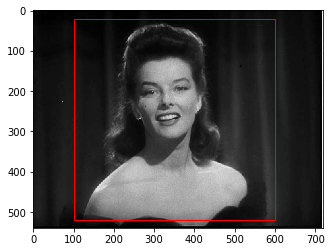

In [22]:
ix, iy, ix2, iy2 = 100, 20, 600, 520
figure, ax = plt.subplots(1)
if(ix2 <ix):
    ix2, ix = ix, ix2
if(iy2<iy):
    iy2, iy = iy, iy2

width = abs(ix2-ix)
height = abs(iy2-iy)
xStart = ix
yStart = iy


rect = patches.Rectangle((ix ,iy),width ,height , edgecolor='r', facecolor="none")
ax.imshow(img)
ax.add_patch(rect)
rect = (xStart,yStart,width,height)

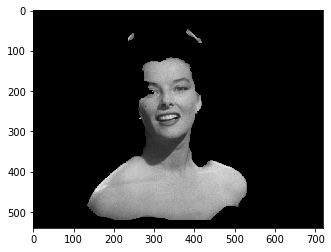

In [23]:
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img)